In [11]:
pip install tensorflow==2.9.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 43.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 78.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 99.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 98.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 73.6 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.3.3
    Uninstalling flatbuffers-23.3.3:
      Successfully uninstalled flatbuffers-23.3.3
  Attempting unin

In [2]:
import tensorflow as tf
print(tf.__version__)

2.9.0


In [3]:
pip install opencv-python


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import tensorflow
from tensorflow import keras
import os
import random
import cv2
from os import listdir
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.layers import Dense, Dropout, Flatten
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization
import numpy as np
from sklearn.metrics import classification_report
from tensorflow.keras.applications import ResNet50
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import floor
from math import floor
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [5]:
# path = "/content/drive/MyDrive/Colab Notebooks/Data/Sport Images"
# # class_names = os.listdir(path)
# class_names = [name for name in os.listdir(path) if name != 'Image URLs']
# class_names

In [5]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/Colab Notebooks/Data/Sport Images"
# class_names = os.listdir(path)
class_names = [name for name in os.listdir(path) if name != 'Image URLs']
class_names

Mounted at /content/drive


['baseball', 'tennis', 'basketball', 'fencing', 'volleyball']

# New Section

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
import pandas as pd

# Set the fixed image size
img_size = (224, 224)

# Initialize an empty DataFrame to hold the images and labels for each set
data_df = pd.DataFrame(columns=['filepath', 'dataset', 'label'])

for i, class_name in enumerate(class_names):
    # Set the path to the class folder
    class_path = os.path.join(path, class_name)
    
    # Get the list of image filenames in the class folder
    image_filenames = os.listdir(class_path)
    
    # Randomly shuffle the image filenames
    random.shuffle(image_filenames)
    
    # Calculate the number of images for each set
    num_images = len(image_filenames)
    num_train_images = int(np.ceil(0.7 * num_images))
    num_val_images = int(np.ceil(0.15 * num_images))
    num_test_images = num_images - num_train_images - num_val_images
    
    # Loop through the image filenames and resize or zero-pad the images
    for j, image_filename in enumerate(image_filenames):
        # Set the path to the image file
        image_path = os.path.join(class_path, image_filename)
        
      
        if j < num_train_images:
            dataset = 'train'
        elif j < num_train_images + num_val_images:
            dataset = 'val'
        else:
            dataset = 'test'
        
        # Append a new row to the DataFrame with the image filepath, dataset, and label
        data_df = pd.concat([data_df, pd.DataFrame({'filepath': [image_path], 'dataset': [dataset], 'label': [i],'class_name' : class_name})], ignore_index = True)



In [8]:
data_df

,filepath,dataset,label,class_name
0,/content/drive/MyDrive/Colab Notebooks/Data/Sp...,train,0,baseball
1,/content/drive/MyDrive/Colab Notebooks/Data/Sp...,train,0,baseball
2,/content/drive/MyDrive/Colab Notebooks/Data/Sp...,train,0,baseball
3,/content/drive/MyDrive/Colab Notebooks/Data/Sp...,train,0,baseball
4,/content/drive/MyDrive/Colab Notebooks/Data/Sp...,train,0,baseball
...,...,...,...,...
3460,/content/drive/MyDrive/Colab Notebooks/Data/Sp...,test,4,volleyball
3461,/content/drive/MyDrive/Colab Notebooks/Data/Sp...,test,4,volleyball
3462,/content/drive/MyDrive/Colab Notebooks/Data/Sp...,test,4,volleyball
3463,/content/drive/MyDrive/Colab Notebooks/Data/Sp...,test,4,volleyball


In [9]:
X = data_df[['filepath','dataset']]
y = pd.get_dummies(data_df['label'])
data_df_one_hot = pd.concat([data_df,pd.get_dummies(data_df['label'])],axis=1)
cols = data_df_one_hot.columns[-1:-21:-1]



In [ ]:
  # Load the image using OpenCV
#         image = cv2.imread(image_path)
        
#         # Check if the image was successfully loaded
#         if image is None:
#             continue
        
        # Resize or zero-pad the image to the fixed size
#         if image.shape[:2] != img_size:
#             h, w = image.shape[:2]
#             if h > w:
#                 scale_factor = img_size[0] / h
#                 new_h = img_size[0]
#                 new_w = int(w * scale_factor)
#             else:
#                 scale_factor = img_size[1] / w
#                 new_h = int(h * scale_factor)
#                 new_w = img_size[1]
#             image = cv2.resize(image, (new_w, new_h))
#             top = (img_size[0] - new_h) // 2
#             bottom = img_size[0] - new_h - top
#             left = (img_size[1] - new_w) // 2
#             right = img_size[1] - new_w - left
#             image = cv2.copyMakeBorder(image, top, bottom, left, right, cv2.BORDER_CONSTANT, value=[0, 0, 0])
        
        # Determine the dataset for the image

In [10]:
# trainingDataFrame = data_df_one_hot.loc[data_df_one_hot['dataset']=='train']
# valDataFrame = data_df_one_hot.loc[data_df_one_hot['dataset']=='val']
# testDataFrame = data_df_one_hot.loc[data_df_one_hot['dataset']=='test']


trainingDataFrame = data_df_one_hot.query('dataset == "train"')
valDataFrame = data_df_one_hot.query('dataset == "val"')
testDataFrame = data_df_one_hot.query('dataset == "test"')

In [12]:
trainingDataFrame

,filepath,dataset,label,class_name,0,1,2,3,4
0,/content/drive/MyDrive/Colab Notebooks/Data/Sp...,train,0,baseball,1,0,0,0,0
1,/content/drive/MyDrive/Colab Notebooks/Data/Sp...,train,0,baseball,1,0,0,0,0
2,/content/drive/MyDrive/Colab Notebooks/Data/Sp...,train,0,baseball,1,0,0,0,0
3,/content/drive/MyDrive/Colab Notebooks/Data/Sp...,train,0,baseball,1,0,0,0,0
4,/content/drive/MyDrive/Colab Notebooks/Data/Sp...,train,0,baseball,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
3245,/content/drive/MyDrive/Colab Notebooks/Data/Sp...,train,4,volleyball,0,0,0,0,1
3246,/content/drive/MyDrive/Colab Notebooks/Data/Sp...,train,4,volleyball,0,0,0,0,1
3247,/content/drive/MyDrive/Colab Notebooks/Data/Sp...,train,4,volleyball,0,0,0,0,1
3248,/content/drive/MyDrive/Colab Notebooks/Data/Sp...,train,4,volleyball,0,0,0,0,1


In [13]:
valDataFrame

,filepath,dataset,label,class_name,0,1,2,3,4
530,/content/drive/MyDrive/Colab Notebooks/Data/Sp...,val,0,baseball,1,0,0,0,0
531,/content/drive/MyDrive/Colab Notebooks/Data/Sp...,val,0,baseball,1,0,0,0,0
532,/content/drive/MyDrive/Colab Notebooks/Data/Sp...,val,0,baseball,1,0,0,0,0
533,/content/drive/MyDrive/Colab Notebooks/Data/Sp...,val,0,baseball,1,0,0,0,0
534,/content/drive/MyDrive/Colab Notebooks/Data/Sp...,val,0,baseball,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
3353,/content/drive/MyDrive/Colab Notebooks/Data/Sp...,val,4,volleyball,0,0,0,0,1
3354,/content/drive/MyDrive/Colab Notebooks/Data/Sp...,val,4,volleyball,0,0,0,0,1
3355,/content/drive/MyDrive/Colab Notebooks/Data/Sp...,val,4,volleyball,0,0,0,0,1
3356,/content/drive/MyDrive/Colab Notebooks/Data/Sp...,val,4,volleyball,0,0,0,0,1


In [14]:
testDataFrame

,filepath,dataset,label,class_name,0,1,2,3,4
644,/content/drive/MyDrive/Colab Notebooks/Data/Sp...,test,0,baseball,1,0,0,0,0
645,/content/drive/MyDrive/Colab Notebooks/Data/Sp...,test,0,baseball,1,0,0,0,0
646,/content/drive/MyDrive/Colab Notebooks/Data/Sp...,test,0,baseball,1,0,0,0,0
647,/content/drive/MyDrive/Colab Notebooks/Data/Sp...,test,0,baseball,1,0,0,0,0
648,/content/drive/MyDrive/Colab Notebooks/Data/Sp...,test,0,baseball,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
3460,/content/drive/MyDrive/Colab Notebooks/Data/Sp...,test,4,volleyball,0,0,0,0,1
3461,/content/drive/MyDrive/Colab Notebooks/Data/Sp...,test,4,volleyball,0,0,0,0,1
3462,/content/drive/MyDrive/Colab Notebooks/Data/Sp...,test,4,volleyball,0,0,0,0,1
3463,/content/drive/MyDrive/Colab Notebooks/Data/Sp...,test,4,volleyball,0,0,0,0,1


In [11]:
# def random_crop(image):
#     cropped = tf.image.random_crop(image, size=[200, 200, 3])
#     cropped = tf.image.resize(cropped,(224,224))
#     return cropped

def random_crop(image):
  cropped = tf.image.random_crop(image, size=[200, 200, 3])
  cropped = tf.image.random_contrast(cropped, lower=1.0, upper=1.0)
  cropped = cropped * 0.15
  cropped = tf.image.resize(cropped, (224, 224))
  return cropped

In [12]:
entire_datagen = ImageDataGenerator(
        rotation_range = 20,
        zoom_range=0.05,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=0.05,
        horizontal_flip=True,
        fill_mode="nearest",
        preprocessing_function = random_crop,
        brightness_range=(0.3, 1)
        )


In [13]:
train_datagen = ImageDataGenerator(
        rotation_range = 20,
        zoom_range=0.05,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=0.05,
        horizontal_flip=True,
        fill_mode="nearest",
        preprocessing_function = random_crop,
        brightness_range=(0.3, 1)
        )


In [14]:
test_datagen = ImageDataGenerator()

In [15]:
entire_data_generator = entire_datagen.flow_from_dataframe(
    dataframe = data_df_one_hot,
    directory = None,
    x_col="filepath",
    y_col=[x for x in range(0,5)],
    target_size=(224, 224),
    batch_size = 5,
    class_mode="raw",
    
    seed=42
)

Found 3444 validated image filenames.


In [16]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe = trainingDataFrame,
    directory=None,
    x_col="filepath",
    y_col=[x for x in range(0,5)],
    target_size=(224, 224),
    batch_size = 5,
    class_mode="raw",
    
    seed=42
)
valid_generator = test_datagen.flow_from_dataframe(
    dataframe = valDataFrame,
    directory=None,
    x_col="filepath",
    y_col=[x for x in range(0,5)],
    target_size=(224, 224),
    batch_size = 5,
    class_mode="raw",
    shuffle=False
)
test_generator= test_datagen.flow_from_dataframe(
    dataframe = testDataFrame,
    directory = None,
    x_col="filepath",
    y_col=[x for x in range(0,5)],
    target_size=(224, 224),
    batch_size = 1,
    class_mode="raw",
    shuffle=False
)


Found 2412 validated image filenames.
Found 521 validated image filenames.
Found 511 validated image filenames.


In [17]:
def vggPreprocessCrop(image):
    image = preprocess_input(image)
    image = random_crop(image)
    return image

In [18]:
entire_datagenerator_vgg = ImageDataGenerator(
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=0.05,
        horizontal_flip=True,
        rotation_range=20,
        zoom_range=0.05,
        fill_mode="nearest",
        preprocessing_function = vggPreprocessCrop,
        brightness_range=(0.3, 1)
        )

In [19]:
train_datagenerator_vgg = ImageDataGenerator(
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=0.05,
        horizontal_flip=True,
        rotation_range=20,
        zoom_range=0.05,
        fill_mode="nearest",
        preprocessing_function = vggPreprocessCrop,
        brightness_range=(0.3, 1)
        )
test_datagenerator_vgg = ImageDataGenerator(preprocessing_function=preprocess_input)

In [20]:
entire_generator_vgg = entire_datagenerator_vgg.flow_from_dataframe(
    dataframe = data_df_one_hot,
    directory = None,
    x_col="filepath",
    y_col=[x for x in range(0,5)],
    target_size=(224, 224),
    batch_size=5,
    class_mode="raw",
    
    seed=42
)

train_generator_vgg = train_datagenerator_vgg.flow_from_dataframe(
    dataframe = trainingDataFrame,
    directory = None,
    x_col="filepath",
    y_col=[x for x in range(0,5)],
    target_size=(224, 224),
    batch_size=5,
    class_mode="raw",
    
    seed=42
)
valid_generator_vgg = test_datagenerator_vgg.flow_from_dataframe(
    dataframe=valDataFrame,
    directory=None,
    x_col="filepath",
    y_col=[x for x in range(0,5)],
    target_size=(224, 224),
    batch_size=5,
    class_mode="raw",
    shuffle=False
)
test_generator_vgg= test_datagenerator_vgg.flow_from_dataframe(
    dataframe=testDataFrame,
    directory=None,
    x_col="filepath",
    y_col=[x for x in range(0,5)],
    target_size=(224, 224),
    batch_size=1,
    class_mode="raw",
    shuffle=False
)

Found 3444 validated image filenames.
Found 2412 validated image filenames.
Found 521 validated image filenames.
Found 511 validated image filenames.


In [21]:
data_df_one_hot

,filepath,dataset,label,class_name,0,1,2,3,4
0,/content/drive/MyDrive/Colab Notebooks/Data/Sp...,train,0,baseball,1,0,0,0,0
1,/content/drive/MyDrive/Colab Notebooks/Data/Sp...,train,0,baseball,1,0,0,0,0
2,/content/drive/MyDrive/Colab Notebooks/Data/Sp...,train,0,baseball,1,0,0,0,0
3,/content/drive/MyDrive/Colab Notebooks/Data/Sp...,train,0,baseball,1,0,0,0,0
4,/content/drive/MyDrive/Colab Notebooks/Data/Sp...,train,0,baseball,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
3460,/content/drive/MyDrive/Colab Notebooks/Data/Sp...,test,4,volleyball,0,0,0,0,1
3461,/content/drive/MyDrive/Colab Notebooks/Data/Sp...,test,4,volleyball,0,0,0,0,1
3462,/content/drive/MyDrive/Colab Notebooks/Data/Sp...,test,4,volleyball,0,0,0,0,1
3463,/content/drive/MyDrive/Colab Notebooks/Data/Sp...,test,4,volleyball,0,0,0,0,1


In [22]:
input_shape = (224, 224,3)
n_classes = 5

In [45]:
conv_base = VGG16(include_top = False, weights = 'imagenet', input_shape = input_shape)
conv_base.trainable = False

best_model = conv_base.output
best_model = Flatten(name="flatten")(best_model)
best_model= BatchNormalization()(best_model)

#Adding layers to improve accuracy
best_model = Dense(200, activation='relu')(best_model)
best_model = Dense(100, activation='relu')(best_model)
best_model = Dense(50, activation='relu')(best_model)

#best_model = Dense(n_classes, activation='relu')(best_model)
best_model = Dropout(0.2)(best_model)
output_layer = Dense(n_classes, activation='softmax')(best_model)
vgg_model = Model(inputs = conv_base.input, outputs=output_layer)
vgg_model.compile(optimizer = Adam(learning_rate = 0.001), 
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

n_epochs = 50


58889256/58889256 [==============================] - 3s 0us/step


In [46]:
filenames = test_generator.filenames
nb_samples = len(filenames)
nb_samples

511

In [47]:
def printResults(model,test_generator):
    filenames = test_generator.filenames
    nb_samples = len(filenames)
    y_predict = model.predict(test_generator,steps = nb_samples)
    predicted_labels = np.argmax(y_predict,axis=1)
    y_true = np.argmax(test_generator.labels,axis=1)
    print(classification_report(y_true,predicted_labels,target_names=[str(x) for x in range(0,5)]))
    print(confusion_matrix(y_true,predicted_labels))

In [48]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

def printResultsTraining(model,test_generator):
    filenames = test_generator.filenames
    nb_samples = len(filenames)
    y_predict = model.predict(test_generator,steps = nb_samples)
    predicted_labels = np.argmax(y_predict,axis=1)
    y_true = np.argmax(test_generator.labels,axis=1)
    precision = precision_score(y_true, predicted_labels, average='macro')
    recall = recall_score(y_true, predicted_labels, average='macro')
    f1 = f1_score(y_true, predicted_labels, average='macro')
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, predicted_labels))

In [49]:
test_generator

In [31]:
# def printResults2(model, test_generator):
#     filenames = test_generator.filenames
#     nb_samples = len(filenames)
#     y_pred = model.predict(test_generator, steps=nb_samples)
#     y_pred_labels = np.argmax(y_pred, axis=1)
#     y_true = test_generator.labels
#     class_names = dict(zip(range(len(test_generator.class_indices)), test_generator.class_indices))

#     # Print classification report
#     print(classification_report(y_true, y_pred_labels, target_names=class_names.values()))

#     # Compute the confusion matrix
#     cm = confusion_matrix(y_true, y_pred_labels)

#     # Plot the confusion matrix
#     plt.figure(figsize=(8, 8))
#     sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_names.values(), yticklabels=class_names.values())
#     plt.xlabel('Predicted labels')
#     plt.ylabel('True labels')
#     plt.title('Confusion matrix')
#     plt.show()


In [50]:
modelCheckpoint = ModelCheckpoint(filepath='vgg16b_best.hdf5',
                                  save_best_only=True,
                                  verbose=1)

early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

In [51]:
vgg_history = vgg_model.fit(train_generator_vgg,
                            epochs = n_epochs,
                            batch_size = 5,
                            validation_data=valid_generator_vgg,
                            callbacks=[modelCheckpoint, early_stop],
                            verbose=1)

Epoch 1/50
483/483 [==============================] - ETA: 0s - loss: 1.0133 - accuracy: 0.6459
Epoch 1: val_loss improved from inf to 0.60003, saving model to vgg16b_best.hdf5
483/483 [==============================] - 47s 95ms/step - loss: 1.0133 - accuracy: 0.6459 - val_loss: 0.6000 - val_accuracy: 0.8560
Epoch 2/50
483/483 [==============================] - ETA: 0s - loss: 0.6574 - accuracy: 0.7612
Epoch 2: val_loss did not improve from 0.60003
483/483 [==============================] - 45s 94ms/step - loss: 0.6574 - accuracy: 0.7612 - val_loss: 0.6510 - val_accuracy: 0.8772
Epoch 3/50
483/483 [==============================] - ETA: 0s - loss: 0.5937 - accuracy: 0.8031
Epoch 3: val_loss improved from 0.60003 to 0.39681, saving model to vgg16b_best.hdf5
483/483 [==============================] - 45s 94ms/step - loss: 0.5937 - accuracy: 0.8031 - val_loss: 0.3968 - val_accuracy: 0.9040
Epoch 4/50
483/483 [==============================] - ETA: 0s - loss: 0.5079 - accuracy: 0.8329
Epoc

In [52]:
def plot_epoch_vs_acc(history):
    plt.plot([1-x for x in history.history['accuracy']])
    plt.plot([1-x for x in history.history['val_accuracy']])
    plt.title('Error vs Epoch')
    plt.ylabel('error')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

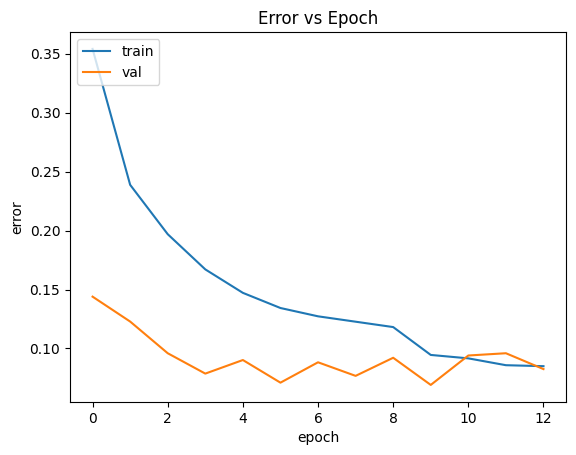

In [53]:
plot_epoch_vs_acc(vgg_history)

In [54]:
vgg_model.load_weights('vgg16b_best.hdf5')

In [79]:
print('Accuracy of vgg16 Training as found in the epoch logs', 0.9175)

Accuracy of vgg16 Training as found in the epoch logs 0.9175


In [55]:
printResults(vgg_model,test_generator_vgg)

511/511 [==============================] - 3s 5ms/step
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       111
           1       0.85      0.89      0.87       106
           2       0.88      0.84      0.86        86
           3       0.95      0.89      0.92       101
           4       0.89      0.85      0.87       107

    accuracy                           0.88       511
   macro avg       0.88      0.88      0.88       511
weighted avg       0.88      0.88      0.88       511

[[104   4   2   1   0]
 [  6  94   1   1   4]
 [  5   4  72   0   5]
 [  4   5   0  90   2]
 [  2   4   7   3  91]]


The accuracy of the training Set can be found in epoch logs above

In [58]:
printResultsTraining(vgg_model,train_generator_vgg)

 482/2412 [====>.........................] - ETA: 2:52

2412/2412 [==============================] - 43s 18ms/step
Precision: 0.20
Recall: 0.20
F1-score: 0.20
Confusion Matrix:
[[116 121  94  89 109]
 [120  93  68 112 107]
 [ 79  99  71  71  84]
 [ 84 116  73 120  84]
 [115 122  80  93  92]]


In [59]:
modelCheckpointFull = ModelCheckpoint(filepath='vgg16b_best.hdf5',
                                  save_weights_only=True,
                                  save_best_only = True,
                                  verbose=1)
early_stop_full = EarlyStopping(monitor='loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

In [60]:
import warnings
warnings.filterwarnings("ignore")

While reusing validation and testset we will run the model only uptil the epoch where it stopped when we ran it just for training data.

In [62]:
vgg_history_full = vgg_model.fit(entire_generator_vgg,
                            epochs = 13,
                            batch_size=5,
                            callbacks = [tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)],
                            verbose=1)

Epoch 1/13
689/689 [==============================] - 61s 89ms/step - loss: 0.5625 - accuracy: 0.8188
Epoch 2/13
689/689 [==============================] - 61s 89ms/step - loss: 0.4637 - accuracy: 0.8458
Epoch 3/13
689/689 [==============================] - 61s 89ms/step - loss: 0.4369 - accuracy: 0.8656
Epoch 4/13
689/689 [==============================] - 61s 89ms/step - loss: 0.3889 - accuracy: 0.8746
Epoch 5/13
689/689 [==============================] - 61s 88ms/step - loss: 0.3405 - accuracy: 0.8975
Epoch 6/13
689/689 [==============================] - 61s 88ms/step - loss: 0.3509 - accuracy: 0.8914
Epoch 7/13
689/689 [==============================] - 61s 88ms/step - loss: 0.3075 - accuracy: 0.9036
Epoch 8/13
689/689 [==============================] - 61s 89ms/step - loss: 0.3018 - accuracy: 0.9111
Epoch 9/13
689/689 [==============================] - 61s 88ms/step - loss: 0.2571 - accuracy: 0.9187
Epoch 10/13
689/689 [==============================] - 61s 89ms/step - loss: 0.242

In [42]:
vgg_model.save('vgg16b_best.hdf5')
# vgg_model.load_weights('vgg16b_best_complete.hdf5')
# printResults(vgg_model,entire_generator_vgg)

In [27]:
input_shape=(224, 224,3)
n_classes = 5

In [28]:
# input_shape=(224, 224,3)
# n_classes = 5

conv_base = EfficientNetB0(include_top = False,weights='imagenet', input_shape=input_shape)
conv_base.trainable=False

best_model = conv_base.output
best_model = Flatten(name="flatten")(best_model)
best_model=BatchNormalization()(best_model)

#best_model = Dense(500, activation='relu')(best_model)
best_model = Dense(200, activation='relu')(best_model)
best_model = Dense(100, activation='relu')(best_model)
best_model = Dropout(0.2)(best_model)
output_layer = Dense(n_classes, activation='softmax')(best_model)

efficientNet_model = Model(inputs=conv_base.input, outputs=output_layer)

efficientNet_model.compile(optimizer=Adam(learning_rate=0.001), 
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

n_epochs = 50

In [29]:
modelCheckpoint = ModelCheckpoint(filepath='efficient_best.hdf5',
                                  save_best_only=True,
                                     verbose=1)

early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

In [30]:
efficientNet_history = efficientNet_model.fit(train_generator,
                            epochs = n_epochs,
                            batch_size = 5,
                            validation_data = valid_generator,
                            callbacks=[modelCheckpoint, early_stop],
                            verbose=1)

Epoch 1/50
483/483 [==============================] - ETA: 0s - loss: 2.5338 - accuracy: 0.6733
Epoch 1: val_loss improved from inf to 0.40824, saving model to efficient_best.hdf5
483/483 [==============================] - 1679s 3s/step - loss: 2.5338 - accuracy: 0.6733 - val_loss: 0.4082 - val_accuracy: 0.9040
Epoch 2/50
483/483 [==============================] - ETA: 0s - loss: 0.7880 - accuracy: 0.7807
Epoch 2: val_loss improved from 0.40824 to 0.38699, saving model to efficient_best.hdf5
483/483 [==============================] - 46s 96ms/step - loss: 0.7880 - accuracy: 0.7807 - val_loss: 0.3870 - val_accuracy: 0.9040
Epoch 3/50
483/483 [==============================] - ETA: 0s - loss: 0.5605 - accuracy: 0.8126
Epoch 3: val_loss improved from 0.38699 to 0.25096, saving model to efficient_best.hdf5
483/483 [==============================] - 45s 93ms/step - loss: 0.5605 - accuracy: 0.8126 - val_loss: 0.2510 - val_accuracy: 0.9328
Epoch 4/50
483/483 [==============================] -

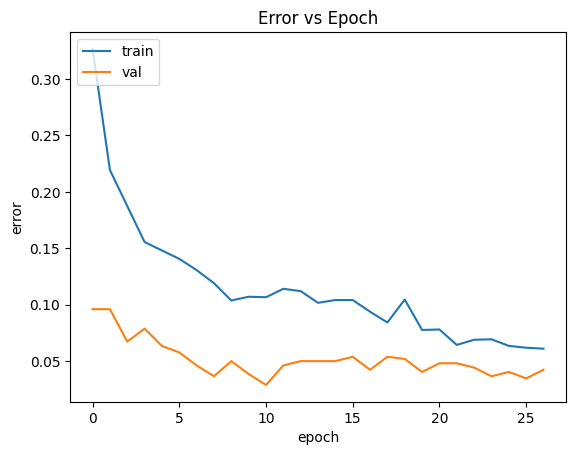

In [31]:
plot_epoch_vs_acc(efficientNet_history)

In [32]:
efficientNet_model.load_weights('efficient_best.hdf5')

In [78]:
print('Accuracy of EfficientNet Training as found in the epoch logs', 0.8959)

Accuracy of EfficientNet Training as found in the epoch logs 0.8959


In [33]:
printResults(efficientNet_model,test_generator)


511/511 [==============================] - 250s 488ms/step
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       111
           1       0.94      0.90      0.92       106
           2       0.85      0.97      0.90        86
           3       0.96      0.87      0.91       101
           4       0.90      0.89      0.90       107

    accuracy                           0.91       511
   macro avg       0.91      0.92      0.91       511
weighted avg       0.92      0.91      0.91       511

[[106   1   1   1   2]
 [  3  95   3   2   3]
 [  0   2  83   0   1]
 [  6   2   1  88   4]
 [  0   1  10   1  95]]


In [66]:
printResultsTraining(efficientNet_model,train_generator)

 482/2412 [====>.........................] - ETA: 2:48

2412/2412 [==============================] - 42s 17ms/step
Precision: 0.21
Recall: 0.20
F1-score: 0.20
Confusion Matrix:
[[134 194  55  61  85]
 [114 180  49  75  82]
 [ 93 150  40  49  72]
 [103 189  34  67  84]
 [128 189  34  65  86]]


While reusing validation and testset we will run the model only uptil the epoch where it stopped when we ran it just for training data.

In [41]:
modelCheckpointFull = ModelCheckpoint(filepath='efficient_best.hdf5',
                                  save_weights_only=True,
                                  save_best_only = True,
                                  verbose=1)
early_stop_full = EarlyStopping(monitor='loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

efficientNet_history_full = efficientNet_model.fit(entire_generator_vgg,
                            epochs = 27,
                            batch_size=5,
                            callbacks = [tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)],
                            verbose=1)

Epoch 1/27
689/689 [==============================] - 62s 90ms/step - loss: 1.0611 - accuracy: 0.5810
Epoch 2/27
689/689 [==============================] - 62s 90ms/step - loss: 1.0383 - accuracy: 0.5993
Epoch 3/27
689/689 [==============================] - 62s 90ms/step - loss: 1.0363 - accuracy: 0.5900
Epoch 4/27
689/689 [==============================] - 62s 90ms/step - loss: 1.0789 - accuracy: 0.5932
Epoch 5/27
689/689 [==============================] - 62s 90ms/step - loss: 1.0878 - accuracy: 0.5894
Epoch 6/27
689/689 [==============================] - 62s 90ms/step - loss: 1.0572 - accuracy: 0.5857
Epoch 7/27
689/689 [==============================] - 62s 90ms/step - loss: 1.0168 - accuracy: 0.6031
Epoch 8/27
689/689 [==============================] - 62s 90ms/step - loss: 1.0004 - accuracy: 0.6092
Epoch 9/27
689/689 [==============================] - 62s 90ms/step - loss: 1.0524 - accuracy: 0.6022
Epoch 10/27
689/689 [==============================] - 62s 90ms/step - loss: 1.050

In [42]:
efficientNet_model.save('efficient_best.hdf5')

In [43]:
# from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# def printResultsTraining(model,test_generator):
#     filenames = test_generator.filenames
#     nb_samples = len(filenames)
#     y_predict = model.predict(test_generator,steps = nb_samples)
#     predicted_labels = np.argmax(y_predict,axis=1)
#     y_true = np.argmax(test_generator.labels,axis=1)
#     precision = precision_score(y_true, predicted_labels, average='macro')
#     recall = recall_score(y_true, predicted_labels, average='macro')
#     f1 = f1_score(y_true, predicted_labels, average='macro')
#     print(f"Precision: {precision:.2f}")
#     print(f"Recall: {recall:.2f}")
#     print(f"F1-score: {f1:.2f}")
#     print("Confusion Matrix:")
#     print(confusion_matrix(y_true, predicted_labels))

The training accuracy can be seen in the epoch logs above

In [53]:
y_true = test_generator.labels

In [67]:
conv_base = ResNet50(include_top=False, weights='imagenet', input_shape=input_shape)
conv_base.trainable=False

best_model = conv_base.output
best_model = Flatten(name="flatten")(best_model)
best_model = BatchNormalization()(best_model)
best_model = Dense(200, activation='relu')(best_model)
best_model = Dense(100, activation='relu')(best_model)
best_model = Dropout(0.2)(best_model)
output_layer = Dense(n_classes, activation='softmax')(best_model)

resnet_model = Model(inputs=conv_base.input, outputs=output_layer)

resnet_model.compile(optimizer=Adam(learning_rate=0.001), 
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

n_epochs = 50

In [68]:
modelCheckpoint = ModelCheckpoint(filepath='resnet_best.hdf5',
                                  save_best_only=True,
                                  verbose=1)

early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

In [69]:
historyofResnet = resnet_model.fit(train_generator,
                                  epochs = n_epochs,
                                  batch_size = 5,
                                  validation_data=valid_generator,
                                  callbacks = [modelCheckpoint, early_stop],
                                  verbose=1)

Epoch 1/50
483/483 [==============================] - ETA: 0s - loss: 3.5482 - accuracy: 0.5871
Epoch 1: val_loss improved from inf to 1.66853, saving model to resnet_best.hdf5
483/483 [==============================] - 51s 99ms/step - loss: 3.5482 - accuracy: 0.5871 - val_loss: 1.6685 - val_accuracy: 0.7620
Epoch 2/50
483/483 [==============================] - ETA: 0s - loss: 1.0523 - accuracy: 0.7019
Epoch 2: val_loss improved from 1.66853 to 0.81900, saving model to resnet_best.hdf5
483/483 [==============================] - 46s 96ms/step - loss: 1.0523 - accuracy: 0.7019 - val_loss: 0.8190 - val_accuracy: 0.8100
Epoch 3/50
483/483 [==============================] - ETA: 0s - loss: 0.7524 - accuracy: 0.7492
Epoch 3: val_loss improved from 0.81900 to 0.67671, saving model to resnet_best.hdf5
483/483 [==============================] - 46s 95ms/step - loss: 0.7524 - accuracy: 0.7492 - val_loss: 0.6767 - val_accuracy: 0.8330
Epoch 4/50
483/483 [==============================] - ETA: 0s 

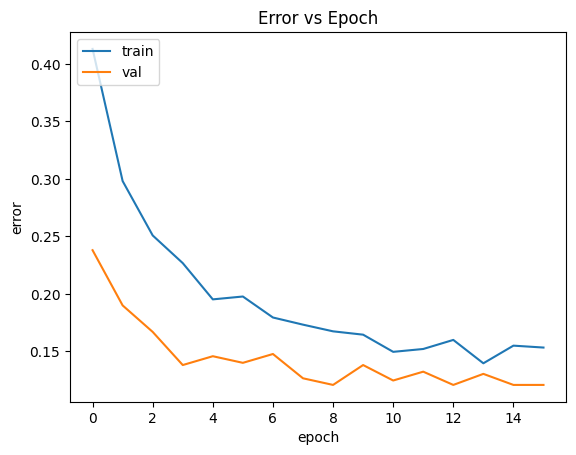

In [70]:
plot_epoch_vs_acc(historyofResnet)

In [71]:
resnet_model.load_weights('resnet_best.hdf5')

In [77]:
print('Accuracy of Resnet Training as found in the epoch logs', 0.8466)

Accuracy of Resnet Training as found in the epoch logs 0.8466


In [72]:
printResults(resnet_model,test_generator)

511/511 [==============================] - 7s 12ms/step
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       111
           1       0.85      0.80      0.83       106
           2       0.84      0.85      0.84        86
           3       0.82      0.92      0.87       101
           4       0.89      0.82      0.85       107

    accuracy                           0.86       511
   macro avg       0.86      0.86      0.86       511
weighted avg       0.86      0.86      0.86       511

[[101   3   4   2   1]
 [  4  85   3   8   6]
 [  4   3  73   4   2]
 [  1   4   1  93   2]
 [  2   5   6   6  88]]


In [76]:
printResultsTraining(resnet_model,train_generator)

 482/2412 [====>.........................] - ETA: 2:47

2412/2412 [==============================] - 42s 17ms/step
Precision: 0.20
Recall: 0.20
F1-score: 0.19
Confusion Matrix:
[[ 48 106  74 227  74]
 [ 54 103  55 220  68]
 [ 37  70  61 172  64]
 [ 40  95  77 200  65]
 [ 59 105  54 215  69]]


In [74]:
modelCheckpointFull = ModelCheckpoint(filepath='resnet_best.hdf5',
                                  save_weights_only=True,
                                  save_best_only = True,
                                  verbose=1)
early_stop_full = EarlyStopping(monitor='loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

historyofResnet_full = resnet_model.fit(entire_generator_vgg,
                            epochs = 16,
                            batch_size=5,
                            callbacks = [tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)],
                            verbose=1)

Epoch 1/16
689/689 [==============================] - 63s 92ms/step - loss: 0.8810 - accuracy: 0.7419
Epoch 2/16
689/689 [==============================] - 62s 90ms/step - loss: 0.5778 - accuracy: 0.8162
Epoch 3/16
689/689 [==============================] - 62s 90ms/step - loss: 0.5490 - accuracy: 0.8301
Epoch 4/16
689/689 [==============================] - 62s 90ms/step - loss: 0.4935 - accuracy: 0.8481
Epoch 5/16
689/689 [==============================] - 62s 90ms/step - loss: 0.4762 - accuracy: 0.8481
Epoch 6/16
689/689 [==============================] - 62s 90ms/step - loss: 0.4655 - accuracy: 0.8574
Epoch 7/16
689/689 [==============================] - 62s 90ms/step - loss: 0.4495 - accuracy: 0.8609
Epoch 8/16
689/689 [==============================] - 62s 90ms/step - loss: 0.4095 - accuracy: 0.8696
Epoch 9/16
689/689 [==============================] - 62s 90ms/step - loss: 0.4105 - accuracy: 0.8798
Epoch 10/16
689/689 [==============================] - 63s 91ms/step - loss: 0.457

In [75]:
resnet_model.save('resnet_best.hdf5')

In [63]:
data_df

,filepath,dataset,label,class_name
0,/content/drive/MyDrive/Colab Notebooks/Data/Sp...,train,0,baseball
1,/content/drive/MyDrive/Colab Notebooks/Data/Sp...,train,0,baseball
2,/content/drive/MyDrive/Colab Notebooks/Data/Sp...,train,0,baseball
3,/content/drive/MyDrive/Colab Notebooks/Data/Sp...,train,0,baseball
4,/content/drive/MyDrive/Colab Notebooks/Data/Sp...,train,0,baseball
...,...,...,...,...
3460,/content/drive/MyDrive/Colab Notebooks/Data/Sp...,test,4,volleyball
3461,/content/drive/MyDrive/Colab Notebooks/Data/Sp...,test,4,volleyball
3462,/content/drive/MyDrive/Colab Notebooks/Data/Sp...,test,4,volleyball
3463,/content/drive/MyDrive/Colab Notebooks/Data/Sp...,test,4,volleyball


In [109]:
batch_size = 5
class_name_to_idx = {class_name: i for i, class_name in enumerate(data_df.class_name)}
class_name_video_to_class_name_image = {"/content/drive/MyDrive/Colab Notebooks/Data/Sport Videos/BaseballPitch":"baseball","/content/drive/MyDrive/Colab Notebooks/Data/Sport Videos/Basketball":"basketball","/content/drive/MyDrive/Colab Notebooks/Data/Sport Videos/Fencing":"fencing","/content/drive/MyDrive/Colab Notebooks/Data/Sport Videos/TennisSwing":"tennis","/content/drive/MyDrive/Colab Notebooks/Data/Sport Videos/VolleyballSpiking":"volleyball"}
# class_name_video_to_class_name_image = {"/content/drive/MyDrive/Colab Notebooks/Data/SportsTestVideos/BaseballPitch":"baseball","/content/drive/MyDrive/Colab Notebooks/Data/SportsTestVideos/Basketball":"basketball","/content/drive/MyDrive/Colab Notebooks/Data/SportsTestVideos/Fencing":"fencing","/content/drive/MyDrive/Colab Notebooks/Data/SportsTestVideos/TennisSwing":"tennis","/content/drive/MyDrive/Colab Notebooks/Data/SportsTestVideos/VolleyballSpiking":"volleyball"}

In [110]:
data_df

,filepath,dataset,label,class_name
0,/content/drive/MyDrive/Colab Notebooks/Data/Sp...,train,0,baseball
1,/content/drive/MyDrive/Colab Notebooks/Data/Sp...,train,0,baseball
2,/content/drive/MyDrive/Colab Notebooks/Data/Sp...,train,0,baseball
3,/content/drive/MyDrive/Colab Notebooks/Data/Sp...,train,0,baseball
4,/content/drive/MyDrive/Colab Notebooks/Data/Sp...,train,0,baseball
...,...,...,...,...
3460,/content/drive/MyDrive/Colab Notebooks/Data/Sp...,test,4,volleyball
3461,/content/drive/MyDrive/Colab Notebooks/Data/Sp...,test,4,volleyball
3462,/content/drive/MyDrive/Colab Notebooks/Data/Sp...,test,4,volleyball
3463,/content/drive/MyDrive/Colab Notebooks/Data/Sp...,test,4,volleyball


In [111]:
class_name_to_idx = {class_name: i for i, class_name in enumerate(data_df.class_name)}
class_name_to_idx = {"volleyball": 0, "tennis":1,"basketball":3, "fencing":4,"baseball":2}
class_name_to_idx

{'volleyball': 0, 'tennis': 1, 'basketball': 3, 'fencing': 4, 'baseball': 2}

In [114]:
def get_average_probabilities(model, num_frames=100):
    video_probabilities = {}
    y_test_true = []
    y_test_preds = []
    y_test_preds_proba = np.zeros((1,5))
    

    for i,(dir,subdir,files) in enumerate(os.walk("/content/drive/MyDrive/Colab Notebooks/Data/Sport Videos")):
    # for i,(dir,subdir,files) in enumerate(os.walk("/content/drive/MyDrive/Colab Notebooks/Data/SportsTestVideos")): 
      # print(i)
      # print(dir)
      # print(subdir)
      # print(files)
      if i==0:
        continue
      complete_filenames = [os.path.join(dir,file) for file in files]
      # print(complete_filenames)
      # print(class_name_video_to_class_name_image[dir])
      # print(class_name_to_idx[class_name_video_to_class_name_image[dir]])
      label_idx = class_name_to_idx[class_name_video_to_class_name_image[dir]]
      # print(label_idx)

      for file in complete_filenames:
        if file[-3:]=="gif":
          continue
        cap = cv2.VideoCapture(file)
        length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

        frame_intervals = floor(length/num_frames)
        if frame_intervals==0:
          frame_intervals=1
            
        count = 0
        success=True

        frames = []

        while success and len(frames)<num_frames:
          success,image = cap.read()
          if success==True:
            if count%frame_intervals==0:
              frames.append(image)
            if cv2.waitKey(10) == 27:                     # exit if Escape is hi
              break
            count += 1

        frames_resized = tf.image.resize(frames,(224,224))

        test_dataset_video = tf.data.Dataset.from_tensor_slices((frames_resized, tf.convert_to_tensor([label_idx]*len(frames_resized)))).batch(batch_size)
           
            # y_test_preds_proba = np.zeros((1,5))
        # y_test_preds_proba = np.zeros((1,5))
        # y_test_preds_proba = np.zeros((1,5))
        for x_batch,_ in test_dataset_video:
          y_test_preds_proba+=np.sum(model.predict(x_batch,verbose=0),axis=0)
        y_test_preds_proba/=len(frames_resized)
        y_test_preds_proba/=len(frames_resized)
        y_test_true += [label_idx]
        y_test_preds += np.argmax(y_test_preds_proba,axis=1).tolist()
        
    acccuracy = accuracy_score(y_test_true,y_test_preds)
    precision = precision_score(y_test_true,y_test_preds,average='macro')
    recall = recall_score(y_test_true,y_test_preds,average='macro')
    f1 = f1_score(y_test_true,y_test_preds,average='macro')
    cm = confusion_matrix(y_test_true,y_test_preds)

    print(f"Accuracy: {acccuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"Confusion Matrix: \n{cm}")

    return y_test_true,y_test_preds_proba,y_test_preds,acccuracy,precision,recall,f1,cm

    #         video_name = os.path.basename(file)
    #         if video_name not in video_probabilities:
    #             video_probabilities[video_name] = []
    #         video_probabilities[video_name].append(y_test_preds_proba)

    # average_probabilities = {}
    # for video_name, probabilities in video_probabilities.items():
    #     average_probability = np.mean(probabilities, axis=0)
    #     average_probabilities[video_name] = average_probability

    # return average_probabilities

In [124]:
y_test_true,y_test_preds_proba,y_test_preds,acccuracy,precision,recall,f1,cm = get_average_probabilities(resnet_model, 100)

Accuracy: 0.2540381791483113
Precision: 0.22783896195105685
Recall: 0.22720033772768472
F1 Score: 0.2106393597144259
Confusion Matrix: 
[[  2   0   0  76  38]
 [ 18 100   5  38   6]
 [124   0   0  26   0]
 [ 31  13   9  70  14]
 [ 11   0   0  99   1]]


In [ ]:
# y_test_true,y_test_preds_proba,y_test_preds,acccuracy,precision,recall,f1,cm = get_average_probabilities(resnet_model, 100)

In [128]:
y_test_true,y_test_preds_proba,y_test_preds,acccuracy,precision,recall,f1,cm = get_average_probabilities(vgg_model, 100)

Accuracy: 0.3465491923641703
Precision: 0.21506057486736876
Recall: 0.30754840683596313
F1 Score: 0.24157956409655493
Confusion Matrix: 
[[  0   4   0  81  31]
 [  1 141   0  23   2]
 [ 82  12   0  56   0]
 [  7  16   6  95  13]
 [  1   0   0 110   0]]


In [115]:
y_test_true,y_test_preds_proba,y_test_preds,acccuracy,precision,recall,f1,cm = get_average_probabilities(efficientNet_model, 100)

Accuracy: 0.1894273127753304
Precision: 0.12472915889326572
Recall: 0.15832597361314407
F1 Score: 0.13825472359545202
Confusion Matrix: 
[[  2  14   2  15  83]
 [ 42 119   0   3   3]
 [134  14   0   2   0]
 [ 39  55   8   6  29]
 [ 21  21   0  67   2]]
